In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00


In [4]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.pipeline import make_pipeline
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import TFBertForSequenceClassification
from nltk.stem import PorterStemmer
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
#Read the dataset
emotion_df_test = pd.read_csv('test.csv')
emotion_df_valid = pd.read_csv('validation.csv')
emotion_df_train = pd.read_csv('training.csv')
emotion_df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
#Dimension of test dataset
emotion_df_test.shape

(2000, 2)

In [8]:
#Dimension of valid dataset
emotion_df_valid.shape

(2000, 2)

In [9]:
#Dimension of train dataset
emotion_df_train.shape

(16000, 2)

In [10]:
#Creating new column for data visualization
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
emotion_df_train['label_description'] = emotion_df_train['label'].map(labels_dict)
emotion_df_train.head()

,text,label,label_description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


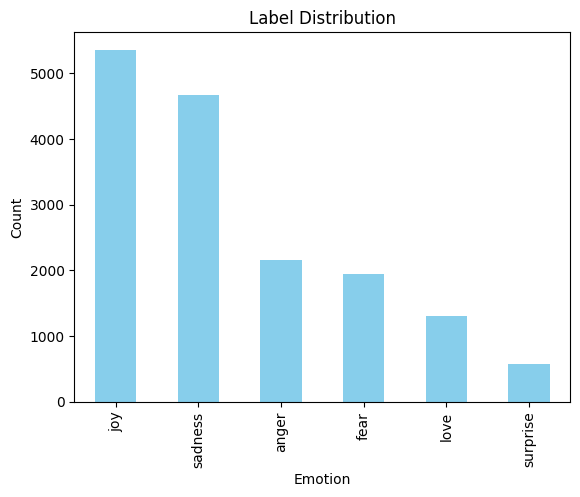

In [11]:
#bar plot for label distribution
emotion_df_train['label_description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [12]:
#Transformer model
# Tokenize text using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return tokens

emotion_df_train['tokenized_text'] = emotion_df_train['text'].apply(tokenize_text)
emotion_df_valid['tokenized_text'] = emotion_df_valid['text'].apply(tokenize_text)

# Pad sequences to a common length
max_len = 64
emotion_df_train['padded_text'] = pad_sequences(emotion_df_train['tokenized_text'], maxlen=max_len, padding='post').tolist()
emotion_df_valid['padded_text'] = pad_sequences(emotion_df_valid['tokenized_text'], maxlen=max_len, padding='post').tolist()

# Define Transformer Model
def build_transformer_model(max_len):
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Transformer Model
transformer_model = build_transformer_model(max_len)
transformer_model.fit(np.array(emotion_df_train['padded_text'].tolist()),
                      np.array(emotion_df_train['label']),
                      epochs=5,
                      validation_data=(np.array(emotion_df_valid['padded_text'].tolist()),
                                       np.array(emotion_df_valid['label'])),
                      shuffle=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
500/500 [==============================] - 288s 411ms/step - loss: 3.4186 - accuracy: 0.1356 - val_loss: 2.2622 - val_accuracy: 0.0890
Epoch 2/5
500/500 [==============================] - 195s 390ms/step - loss: 2.1857 - accuracy: 0.0945 - val_loss: 2.2622 - val_accuracy: 0.0890
Epoch 3/5
500/500 [==============================] - 195s 389ms/step - loss: 2.1857 - accuracy: 0.0929 - val_loss: 2.2622 - val_accuracy: 0.0890
Epoch 4/5
500/500 [==============================] - 195s 389ms/step - loss: 2.1857 - accuracy: 0.0939 - val_loss: 2.2622 - val_accuracy: 0.0890
Epoch 5/5
500/500 [==============================] - 195s 389ms/step - loss: 2.1857 - accuracy: 0.0924 - val_loss: 2.2622 - val_accuracy: 0.0890


In [13]:
# Evaluate Transformer Model
predictions = transformer_model.predict(np.array(emotion_df_valid['padded_text'].tolist()))
predicted_labels = np.argmax(predictions.logits, axis=1)

# Calculate metrics
true_labels = np.array(emotion_df_valid['label'])

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

63/63 [==============================] - 19s 134ms/step
Accuracy: 0.0890
Precision: 0.9189
Recall: 0.0890
F1 Score: 0.0145


In [14]:
# Capsule Network
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(emotion_df_train['text'])
# Model function
def create_capsule_model(max_len, max_words, num_capsule, dim_capsule, routings, dropout_rate):
    inputs = tf.keras.Input(shape=(max_len,))
    embedding = tf.keras.layers.Embedding(input_dim=max_words, output_dim=128)(inputs)
    spatial_dropout = tf.keras.layers.SpatialDropout1D(0.2)(embedding)
    conv1d = tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu')(spatial_dropout)

    # Flatten the convolutional output
    flatten = tf.keras.layers.Flatten()(conv1d)

    # Capsule layer
    capsule = tf.keras.layers.Dense(num_capsule * dim_capsule, activation='relu')(flatten)
    capsule = tf.keras.layers.Reshape((num_capsule, dim_capsule))(capsule)
    capsule = tf.keras.layers.LayerNormalization()(capsule)

    # Routing algorithm
    for i in range(routings):
        capsule = tf.keras.layers.Lambda(lambda x: tf.keras.backend.l2_normalize(x, axis=-1))(capsule)
        outputs = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x, axis=-2, keepdims=True))(capsule)
        outputs = tf.keras.layers.LayerNormalization()(outputs)
        capsule = tf.keras.layers.Add()([capsule, outputs])

    # Flatten and apply dropout
    capsule = tf.keras.layers.Flatten()(capsule)
    dropout = tf.keras.layers.Dropout(dropout_rate)(capsule)

    # Output layer
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout)

    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Set the maximum sequence length
max_len = 64
X_train = pad_sequences(tokenizer.texts_to_sequences(emotion_df_train['text']), maxlen=max_len, padding='post')
X_valid = pad_sequences(tokenizer.texts_to_sequences(emotion_df_valid['text']), maxlen=max_len, padding='post')

# Convert labels to binary format (assuming binary classification)
positive_class = 1
y_train_binary = (emotion_df_train['label'] == positive_class).astype(int)
y_valid_binary = (emotion_df_valid['label'] == positive_class).astype(int)

# Set hyperparameters for Grid Search
param_grid = {
    'num_capsule': [5, 10],
    'dim_capsule': [16],
    'routings': [2],
    'dropout_rate': [0.2]
}
# Initialize best metrics
best_val_accuracy = 0.0
best_params = {}
best_precision = 0.0
best_recall = 0.0
best_f1 = 0.0

# Specify the number of folds for cross-validation
num_folds = 2
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Iterate through cross-validation folds
for train_index, valid_index in skf.split(X_train, y_train_binary):
    X_train_fold, X_valid_fold = X_train[train_index], X_train[valid_index]
    y_train_fold, y_valid_fold = y_train_binary[train_index], y_train_binary[valid_index]

    for num_capsule in param_grid['num_capsule']:
        for dim_capsule in param_grid['dim_capsule']:
            for routings in param_grid['routings']:
                for dropout_rate in param_grid['dropout_rate']:  # Add dropout_rate to the loop
                    model = create_capsule_model(max_len, max_words, num_capsule, dim_capsule, routings, dropout_rate)
                    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)

                    # Evaluate the model on the validation fold
                    y_pred_binary = (model.predict(X_valid_fold) > 0.5).astype(int)
                    val_accuracy = accuracy_score(y_valid_fold, y_pred_binary)
                    precision = precision_score(y_valid_fold, y_pred_binary, average='binary')
                    recall = recall_score(y_valid_fold, y_pred_binary, average='binary')
                    f1 = f1_score(y_valid_fold, y_pred_binary, average='binary')

                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_params = {'num_capsule': num_capsule, 'dim_capsule': dim_capsule, 'routings': routings, 'dropout_rate': dropout_rate}
                        best_precision = precision
                        best_recall = recall
                        best_f1 = f1

                    print(f"Parameters: {{'num_capsule': {num_capsule}, 'dim_capsule': {dim_capsule}, 'routings': {routings}, 'dropout_rate': {dropout_rate}}}")
                    print(f"Validation Accuracy: {val_accuracy:.2f}")
                    print(f"Precision: {precision:.4f}")
                    print(f"Recall: {recall:.4f}")
                    print(f"F1 Score: {f1:.4f}")
                    print()

print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")


250/250 [==============================] - 1s 2ms/step
Parameters: {'num_capsule': 5, 'dim_capsule': 16, 'routings': 2, 'dropout_rate': 0.2}
Validation Accuracy: 0.93
Precision: 0.9314
Recall: 0.8653
F1 Score: 0.8971

250/250 [==============================] - 1s 2ms/step
Parameters: {'num_capsule': 10, 'dim_capsule': 16, 'routings': 2, 'dropout_rate': 0.2}
Validation Accuracy: 0.93
Precision: 0.8877
Recall: 0.9053
F1 Score: 0.8964

250/250 [==============================] - 1s 2ms/step
Parameters: {'num_capsule': 5, 'dim_capsule': 16, 'routings': 2, 'dropout_rate': 0.2}
Validation Accuracy: 0.92
Precision: 0.9303
Recall: 0.8165
F1 Score: 0.8697

250/250 [==============================] - 1s 3ms/step
Parameters: {'num_capsule': 10, 'dim_capsule': 16, 'routings': 2, 'dropout_rate': 0.2}
Validation Accuracy: 0.93
Precision: 0.8980
Recall: 0.8900
F1 Score: 0.8940

Best Parameters: {'num_capsule': 5, 'dim_capsule': 16, 'routings': 2, 'dropout_rate': 0.2}
Best Validation Accuracy: 0.93
Best

In [15]:
#GNN
class GCNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return x

# Preprocess text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emotion_df_train['text']).toarray()

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X).toarray()
y = emotion_df_train['label']

# Convert to PyTorch tensors
X = torch.FloatTensor(X)
y_numpy = y.to_numpy()
y = torch.LongTensor(y_numpy)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_numpy)

# Count the number of unique labels
output_dim = len(np.unique(y_encoded))
# Specify the number of folds for cross-validation
num_folds = 2
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Set up the parameters for grid search
param_grid = {
    'hidden_dim': [32, 64],
    'lr': [0.01, 0.001]
}

best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0
best_params = {}

# Grid search with k-fold cross-validation
for train_index, valid_index in skf.split(X, y):
    X_train_fold, X_valid_fold = X[train_index], X[valid_index]
    y_train_fold, y_valid_fold = y[train_index], y[valid_index]

    data = Data(x=X_train_fold, edge_index=torch.tensor([], dtype=torch.long).reshape(2, 0), y=y_train_fold)

    for hidden_dim in param_grid['hidden_dim']:
        for lr in param_grid['lr']:
            model = GCNClassifier(input_dim=X.shape[1], hidden_dim=hidden_dim, output_dim=output_dim)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Train the model
            for epoch in range(5):  # Adjust the number of epochs as needed
                optimizer.zero_grad()
                outputs = model(data)
                loss = criterion(outputs, data.y)
                loss.backward()
                optimizer.step()

            # Evaluate the model on the validation fold
            model.eval()
            with torch.no_grad():
                predictions = torch.argmax(model(data), dim=1)
                accuracy = accuracy_score(data.y, predictions)
                precision = precision_score(data.y, predictions, average='weighted', zero_division=1)
                recall = recall_score(data.y, predictions, average='weighted')
                f1 = f1_score(data.y, predictions, average='weighted')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
            if precision > best_precision:
                best_precision = precision
            if recall > best_recall:
                best_recall = recall
            if f1 > best_f1_score:
                best_f1_score = f1
                best_params = {'hidden_dim': hidden_dim, 'lr': lr}

            print(f"Parameters: {{'hidden_dim': {hidden_dim}, 'lr': {lr}}}")
            print(f"Validation Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")

print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Validation Precision: {best_precision:.4f}")
print(f"Best Validation Recall: {best_recall:.4f}")
print(f"Best Validation F1 Score: {best_f1_score:.4f}")


Parameters: {'hidden_dim': 32, 'lr': 0.01}
Validation Accuracy: 0.3845
Precision: 0.7746
Recall: 0.3845
F1 Score: 0.2590
Parameters: {'hidden_dim': 32, 'lr': 0.001}
Validation Accuracy: 0.4920
Precision: 0.6733
Recall: 0.4920
F1 Score: 0.3882
Parameters: {'hidden_dim': 64, 'lr': 0.01}
Validation Accuracy: 0.4778
Precision: 0.7657
Recall: 0.4778
F1 Score: 0.3756
Parameters: {'hidden_dim': 64, 'lr': 0.001}
Validation Accuracy: 0.4973
Precision: 0.7435
Recall: 0.4973
F1 Score: 0.3909
Parameters: {'hidden_dim': 32, 'lr': 0.01}
Validation Accuracy: 0.4773
Precision: 0.7733
Recall: 0.4773
F1 Score: 0.3776
Parameters: {'hidden_dim': 32, 'lr': 0.001}
Validation Accuracy: 0.5545
Precision: 0.6539
Recall: 0.5545
F1 Score: 0.4540
Parameters: {'hidden_dim': 64, 'lr': 0.01}
Validation Accuracy: 0.5861
Precision: 0.7492
Recall: 0.5861
F1 Score: 0.4575
Parameters: {'hidden_dim': 64, 'lr': 0.001}
Validation Accuracy: 0.4128
Precision: 0.7400
Recall: 0.4128
F1 Score: 0.3066
Best Parameters: {'hidden_di

In [16]:
# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(emotion_df_train['text'], emotion_df_train['label'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer, TfidfTransformer and XGBoost classifier
model_xgb = make_pipeline(CountVectorizer(), TfidfTransformer(), xgb.XGBClassifier())

# Set up the parameters for grid search
param_grid = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1],
    'xgbclassifier__max_depth': [3, 5],
}

# Perform grid search
grid_search = GridSearchCV(model_xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model_xgb = grid_search.best_estimator_

# Evaluate the best model on the validation set
predictions_xgb = best_model_xgb.predict(X_valid)

# Print accuracy, precision, recall, and F1 score on the validation set
accuracy_xgb = accuracy_score(y_valid, predictions_xgb)
precision_xgb = precision_score(y_valid, predictions_xgb, average='weighted')
recall_xgb = recall_score(y_valid, predictions_xgb, average='weighted')
f1_xgb = f1_score(y_valid, predictions_xgb, average='weighted')
print("Best Parameters:", grid_search.best_params_)
print(f"XGBoost - Validation Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1 Score: {f1_xgb:.4f}")


Best Parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 200}
XGBoost - Validation Accuracy: 0.8738, Precision: 0.8774, Recall: 0.8738, F1 Score: 0.8739


In [17]:
# Create a pipeline with CountVectorizer, TfidfTransformer, and Random Forest classifier
model_rf = make_pipeline(CountVectorizer(), TfidfTransformer(), RandomForestClassifier())

# Set up the parameters for grid search
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
}

# Perform grid search
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the validation set
predictions_rf = best_model_rf.predict(X_valid)

# Print accuracy, precision, recall, and F1 score
accuracy_rf = accuracy_score(y_valid, predictions_rf)
precision_rf = precision_score(y_valid, predictions_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_valid, predictions_rf, average='weighted', zero_division=1)
f1_rf = f1_score(y_valid, predictions_rf, average='weighted', zero_division=1)
print("Best Parameters:", grid_search_rf.best_params_)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1 Score: {f1_rf:.4f}")


Best Parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 200}
Random Forest - Accuracy: 0.8578, Precision: 0.8630, Recall: 0.8578, F1 Score: 0.8564
